In [1]:
import os
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array

In [ ]:
print(tf._)

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
images_dir = 'G:\Braintumor segmentation\images' 
masks_dir =  'G:\Braintumor segmentation\masks'


input_img_paths = sorted([os.path.join(images_dir, fname) for fname in os.listdir(images_dir) if fname.endswith(".png")])


target_paths = sorted([os.path.join(masks_dir, fname) for fname in os.listdir(masks_dir) if fname.endswith(".png")])

In [4]:
num_samples = len(input_img_paths)

In [5]:
import random

image_size = (150,150)
image_mask = (144,144)
random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_paths)

In [8]:
input_img_paths

['G:\\Braintumor segmentation\\images\\1702.png',
 'G:\\Braintumor segmentation\\images\\1989.png',
 'G:\\Braintumor segmentation\\images\\885.png',
 'G:\\Braintumor segmentation\\images\\2841.png',
 'G:\\Braintumor segmentation\\images\\2098.png',
 'G:\\Braintumor segmentation\\images\\1519.png',
 'G:\\Braintumor segmentation\\images\\2773.png',
 'G:\\Braintumor segmentation\\images\\2427.png',
 'G:\\Braintumor segmentation\\images\\1171.png',
 'G:\\Braintumor segmentation\\images\\2484.png',
 'G:\\Braintumor segmentation\\images\\2817.png',
 'G:\\Braintumor segmentation\\images\\140.png',
 'G:\\Braintumor segmentation\\images\\192.png',
 'G:\\Braintumor segmentation\\images\\1759.png',
 'G:\\Braintumor segmentation\\images\\2543.png',
 'G:\\Braintumor segmentation\\images\\2224.png',
 'G:\\Braintumor segmentation\\images\\1592.png',
 'G:\\Braintumor segmentation\\images\\66.png',
 'G:\\Braintumor segmentation\\images\\2972.png',
 'G:\\Braintumor segmentation\\images\\2875.png',
 'G:\

In [9]:
target_paths

['G:\\Braintumor segmentation\\masks\\1702.png',
 'G:\\Braintumor segmentation\\masks\\1989.png',
 'G:\\Braintumor segmentation\\masks\\885.png',
 'G:\\Braintumor segmentation\\masks\\2841.png',
 'G:\\Braintumor segmentation\\masks\\2098.png',
 'G:\\Braintumor segmentation\\masks\\1519.png',
 'G:\\Braintumor segmentation\\masks\\2773.png',
 'G:\\Braintumor segmentation\\masks\\2427.png',
 'G:\\Braintumor segmentation\\masks\\1171.png',
 'G:\\Braintumor segmentation\\masks\\2484.png',
 'G:\\Braintumor segmentation\\masks\\2817.png',
 'G:\\Braintumor segmentation\\masks\\140.png',
 'G:\\Braintumor segmentation\\masks\\192.png',
 'G:\\Braintumor segmentation\\masks\\1759.png',
 'G:\\Braintumor segmentation\\masks\\2543.png',
 'G:\\Braintumor segmentation\\masks\\2224.png',
 'G:\\Braintumor segmentation\\masks\\1592.png',
 'G:\\Braintumor segmentation\\masks\\66.png',
 'G:\\Braintumor segmentation\\masks\\2972.png',
 'G:\\Braintumor segmentation\\masks\\2875.png',
 'G:\\Braintumor segmenta

In [6]:
def load_images(images_paths):
    return img_to_array(load_img(images_paths, target_size = image_size))
def load_target(mask_paths):
    img = img_to_array(load_img(mask_paths, target_size = image_mask, color_mode = 'grayscale'))
    img = img.astype('uint8')-1
    return img
    

In [7]:
input_imgs = np.zeros((num_samples, ) +  image_size + (3,), dtype = 'float32')
input_targets = np.zeros((num_samples, ) +  image_mask + (1,), dtype = 'uint8')


for i in range(num_samples):
    input_imgs[i] = load_images(input_img_paths[i])
    input_targets[i] = load_target(target_paths[i])

In [22]:
np.unique(input_targets[0])

array([254, 255], dtype=uint8)

In [31]:
input_targets[0]

array([[[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       ...,

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]]], dtype=uint8)

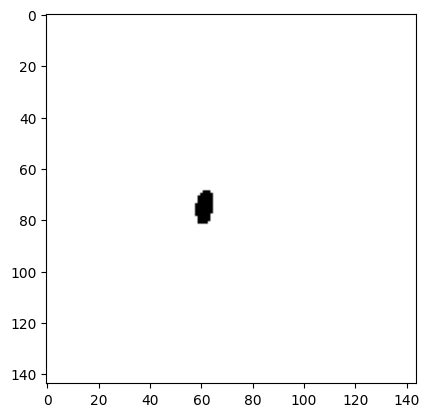

In [23]:
plt.imshow(input_targets[0],cmap = 'gray')

In [24]:
input_imgs.shape

(3064, 150, 150, 3)

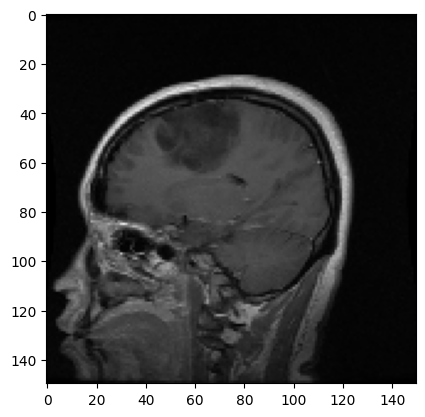

In [25]:
plt.imshow(input_imgs[2].astype('uint8'))

In [8]:
training_images =input_imgs[:2000]
training_masks = input_targets[:2000]//255

valid_images = input_imgs[2000:2500]
valid_masks = input_targets[2000:2500]//255

test_images = input_imgs[2500:]
test_masks = input_targets[2500:]//255

In [32]:
np.unique(training_masks)

array([0, 1], dtype=uint8)

## Def model

In [18]:
import tensorflow as tf
from tensorflow import keras
# Strongest model
from tensorflow.keras import layers


inputs = tf.keras.Input(shape=(150,150,3))



# res = layers.Conv2D(128, 5, activation = 'relu')(res)
# res = layers.MaxPooling2D(2)(res)
# res = layers.BatchNormalization()(res)



conv_1 = layers.Conv2D(32, 3, activation = 'relu', padding = 'same')(inputs)
conv_1 = layers.MaxPooling2D(2)(conv_1)

conv_2 = layers.Conv2D(32,1,activation = 'relu', padding = 'same')(inputs)
conv_2 = layers.Conv2D(32, 7, activation = 'relu' , padding = 'same')(conv_2)
conv_2 = layers.MaxPooling2D(2)(conv_2)

conv_3 = layers.Conv2D(32, 1, activation = 'relu', padding = 'same')(inputs)
conv_3 = layers.Conv2D(32, 5, activation = 'relu', padding = 'same')(conv_3)
conv_3 = layers.MaxPooling2D(2)(conv_3)

conv_4 =  layers.Conv2D(32,1,activation = 'relu', padding = 'same')(inputs)
conv_4 = layers.Conv2D(32, 3, activation = 'relu' , padding = 'same')(conv_4)
conv_4 = layers.MaxPooling2D(2)(conv_4)

conc = layers.Concatenate()([conv_1, conv_2, conv_3, conv_4])

conv_m = layers.SeparableConv2D(128, 1, activation = 'relu', padding = 'same')(conc)
conv_m = layers.SeparableConv2D(128, 3, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.BatchNormalization()(conv_m)
conv_m_out = conc+conv_m


conv_m = layers.SeparableConv2D(128, 1, activation = 'relu', padding = 'same')(conv_m_out)
conv_m = layers.SeparableConv2D(128, 3, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.BatchNormalization()(conv_m)
conv_m = conv_m + conv_m_out

conv_m = layers.Conv2D(128, 3, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.MaxPooling2D(2)(conv_m)
conv_m = layers.BatchNormalization()(conv_m)

conv_m = layers.Conv2D(128, 5, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.MaxPooling2D(2)(conv_m)
conv_m = layers.BatchNormalization()(conv_m)


x_m = layers.MultiHeadAttention(key_dim= 64, num_heads=8, dropout=0.3)(conv_m,conv_m)
x = layers.Dropout(0.4)(x_m)
x = layers.BatchNormalization()(x)
x = x +conv_m


x = layers.Conv2D(128, 5, activation = 'relu', padding = 'same')(x)
x_bn1 = layers.BatchNormalization()(x)


x_m = layers.MultiHeadAttention(key_dim= 64, num_heads=8, dropout=0.3)(x_bn1,x_bn1)
x = layers.Dropout(0.4)(x_m)
x = layers.BatchNormalization()(x)
x = x +x_bn1


x = layers.Conv2D(256, 5, activation = 'relu', padding = 'same')(x)
x = layers.BatchNormalization()(x)


# x = x+res

x = layers.Conv2DTranspose(256, 3, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(256, 3, activation="relu", padding="same",strides=2)(x)
x = layers.Conv2DTranspose(128, 3, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(128, 3, activation="relu", padding="same",strides=2)(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", padding="same", strides=2)(x)


outputs = layers.Conv2D(2, 3, activation="softmax",padding="same")(x)

model = keras.Model(inputs, outputs)
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_13 (Conv2D)             (None, 150, 150, 32  128         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_15 (Conv2D)             (None, 150, 150, 32  128         ['input_2[0][0]']                
                                )                                                           

 dropout_2 (Dropout)            (None, 18, 18, 128)  0           ['multi_head_attention_2[0][0]'] 
                                                                                                  
 batch_normalization_12 (BatchN  (None, 18, 18, 128)  512        ['dropout_2[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 tf.__operators__.add_6 (TFOpLa  (None, 18, 18, 128)  0          ['batch_normalization_12[0][0]', 
 mbda)                                                            'batch_normalization_11[0][0]'] 
                                                                                                  
 conv2d_21 (Conv2D)             (None, 18, 18, 128)  409728      ['tf.__operators__.add_6[0][0]'] 
                                                                                                  
 batch_nor

Transpose Convolution Output Size = (Input Size - 1) * Strides + Filter Size - 2 * Padding + Ouput Padding

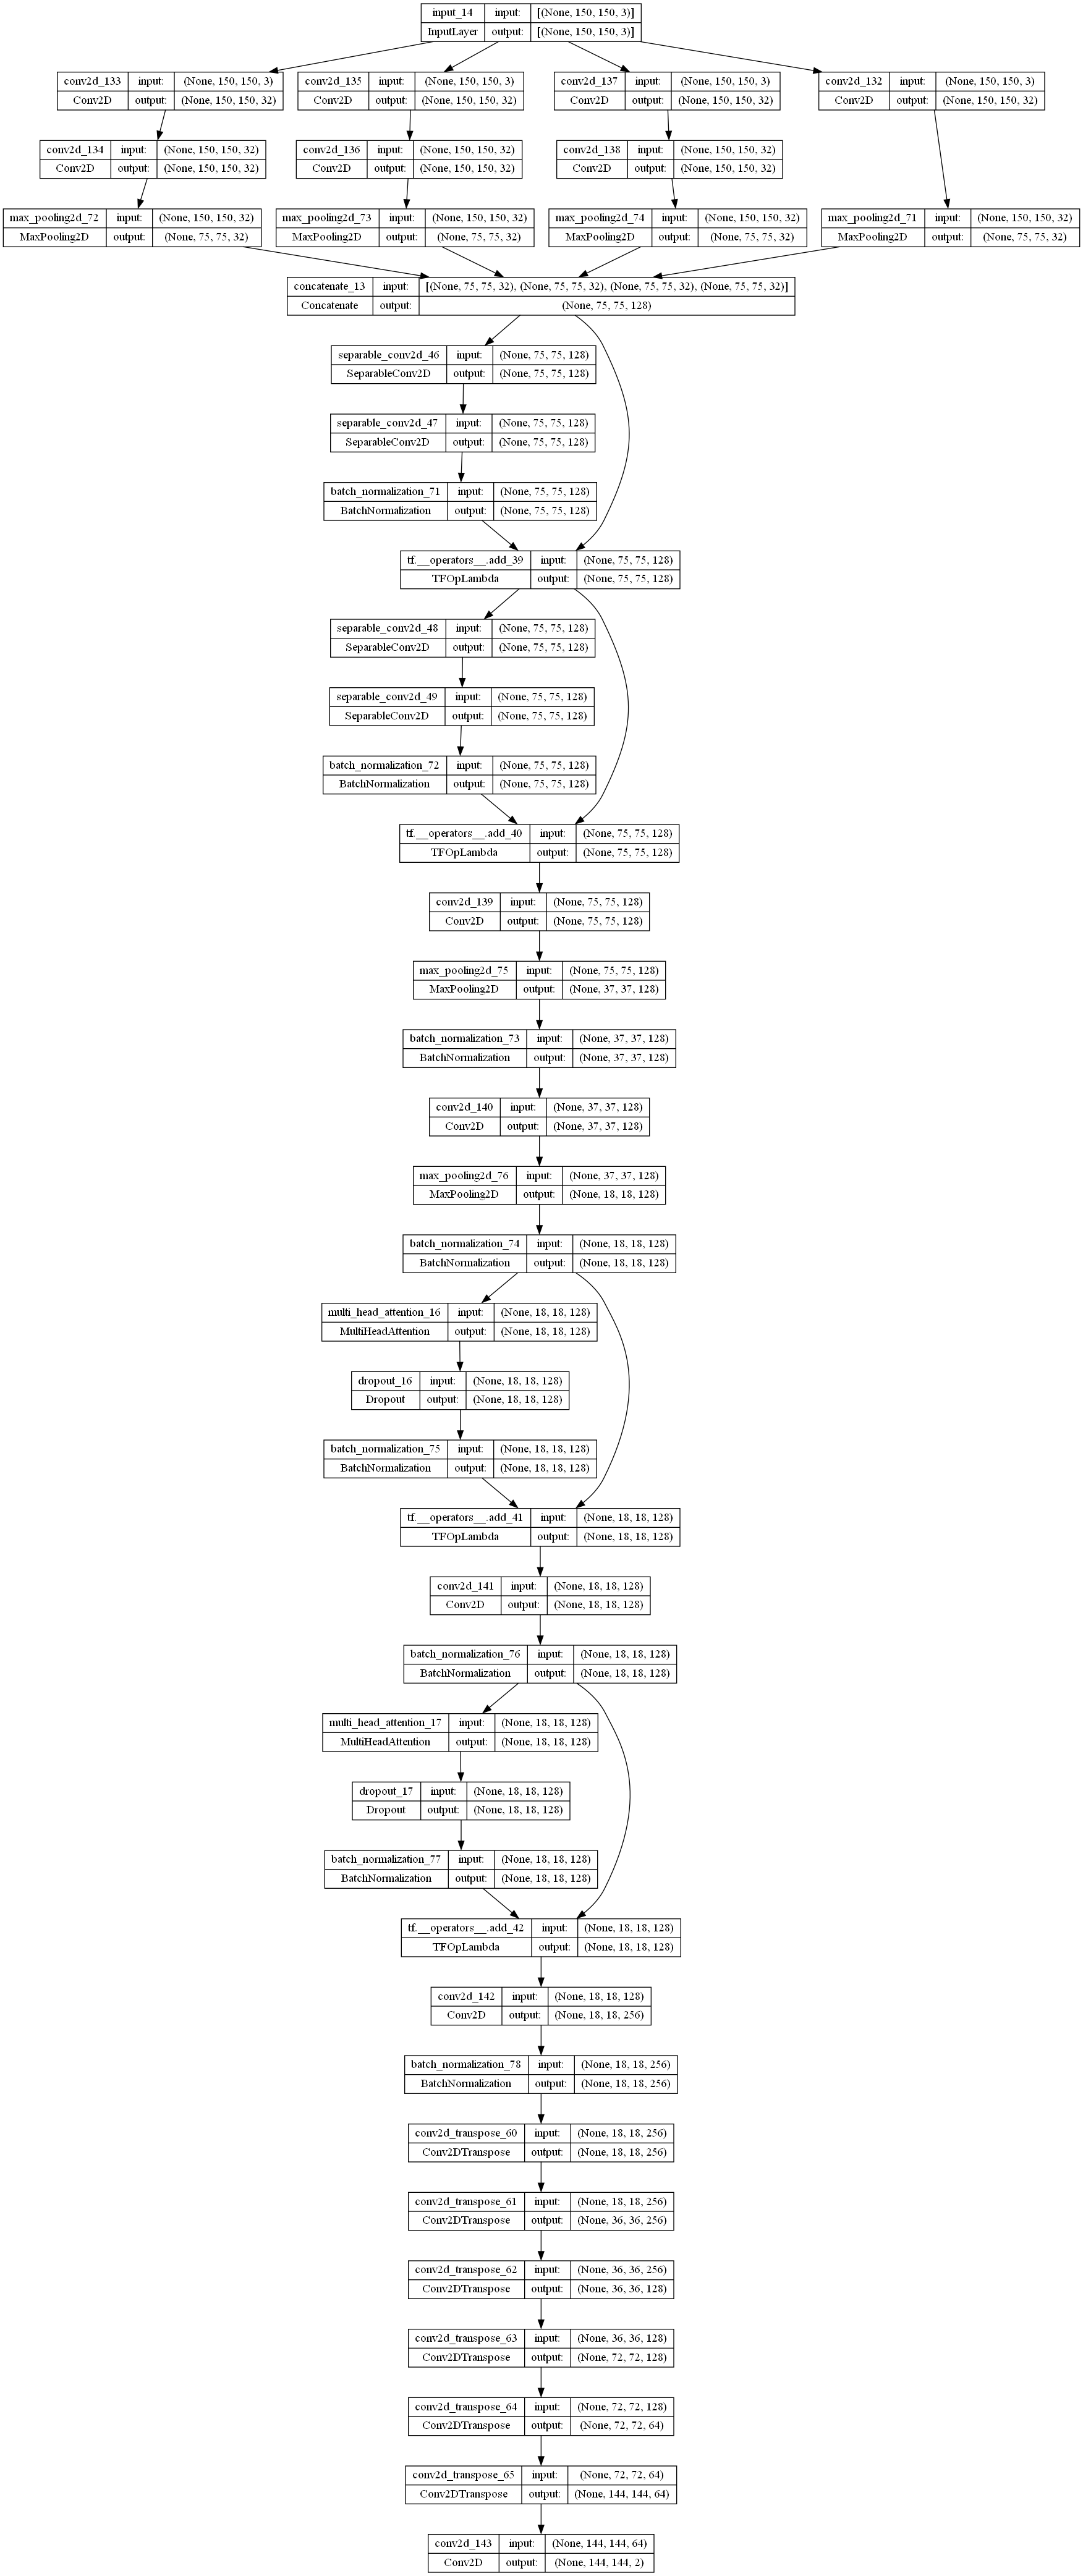

In [16]:
tf.keras.utils.plot_model(model, show_shapes = True)

In [16]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics = ['accuracy'])




import time
import keras.callbacks as callbacks
class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)
time_callback = TimeHistory()
early_stopping_cb = callbacks.EarlyStopping(patience = 10,restore_best_weights=True,verbose = 1, monitor ="val_accuracy")
checkpoint_cb = callbacks.ModelCheckpoint(r"G:\MSc project\segmentation_mymodel_test.h5",save_best_only=True,verbose = 1)

In [ ]:
print(training_images.shape)
print(training_masks.shape)
print(valid_images.shape)
print(valid_masks.shape)

In [17]:
with tf.device('/gpu:0'):
    history = model.fit(
training_images ,
training_masks,
epochs=20,
batch_size = 12,
validation_data=(valid_images,valid_masks),
callbacks = [checkpoint_cb,early_stopping_cb],verbose = 1)


Epoch 1/20
167/167 [==============================] - ETA: 0s - loss: 0.1017 - accuracy: 0.9813
Epoch 1: val_loss improved from inf to 0.12213, saving model to G:\MSc project\segmentation_mymodel_test.h5
167/167 [==============================] - 102s 365ms/step - loss: 0.1017 - accuracy: 0.9813 - val_loss: 0.1221 - val_accuracy: 0.9830
Epoch 2/20
167/167 [==============================] - ETA: 0s - loss: 0.0576 - accuracy: 0.9830
Epoch 2: val_loss improved from 0.12213 to 0.06755, saving model to G:\MSc project\segmentation_mymodel_test.h5
167/167 [==============================] - 57s 340ms/step - loss: 0.0576 - accuracy: 0.9830 - val_loss: 0.0676 - val_accuracy: 0.9830
Epoch 3/20
167/167 [==============================] - ETA: 0s - loss: 0.0458 - accuracy: 0.9851
Epoch 3: val_loss improved from 0.06755 to 0.05778, saving model to G:\MSc project\segmentation_mymodel_test.h5
167/167 [==============================] - 56s 338ms/step - loss: 0.0458 - accuracy: 0.9851 - val_loss: 0.0578 

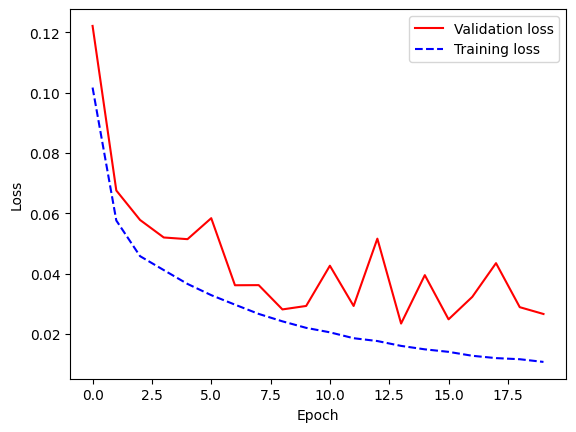

In [21]:
model = tf.keras.models.load_model(r"G:\MSc project\segmentation_mymodel_test.h5")
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'],'r', label = 'Validation loss')
plt.plot(history.history['loss'],'--b',label = 'Training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

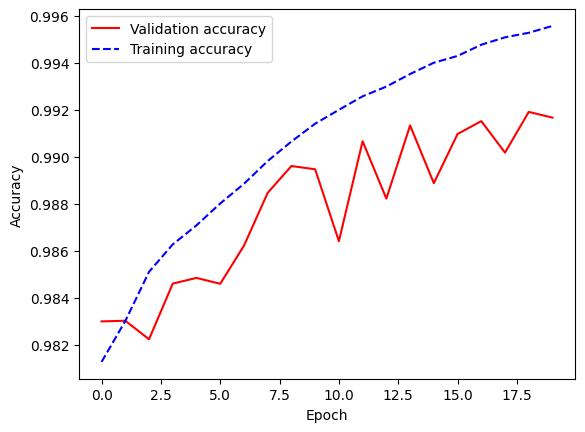

In [22]:
plt.plot(history.history['val_accuracy'],'r', label = 'Validation accuracy')
plt.plot(history.history['accuracy'],'--b',label = 'Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [9]:
model = tf.keras.models.load_model(r"G:\MSc project\segmentation_mymodel_test.h5")
model.evaluate(test_images, test_masks)

18/18 [==============================] - 42s 375ms/step - loss: 0.0219 - accuracy: 0.9917


[0.021878106519579887, 0.9916583895683289]

In [26]:
mask = model.predict(np.expand_dims(test_images[2], 0))[0]


1/1 [==============================] - 2s 2s/step


In [27]:
mask.shape

(144, 144, 2)

In [28]:
new_image = tf.image.resize(
    test_images[2],
    (144,144))

In [32]:
def display_mask(pred,img):
    mask = np.argmax(pred, axis=-1)
    mask *= 127
    print(mask.shape)
    plt.imshow(tf.keras.utils.array_to_img(img))
    plt.imshow(mask,cmap = 'jet', alpha=0.2)
    plt.axis("off")
    plt.show()
#     plt.plot(mask)

    

#     display_mask(mask)

In [33]:
new_image.shape

TensorShape([144, 144, 3])

(144, 144)


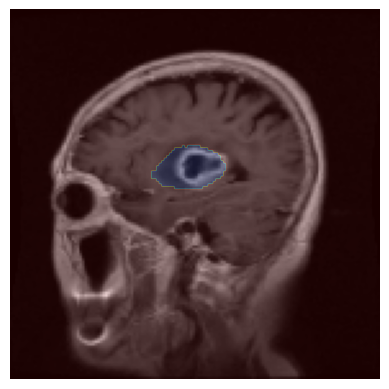

In [34]:
display_mask(mask,tf.keras.utils.array_to_img(new_image))

1/1 [==============================] - 0s 38ms/step
(144, 144)


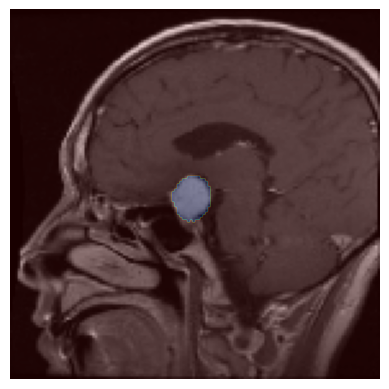

1/1 [==============================] - 0s 36ms/step
(144, 144)


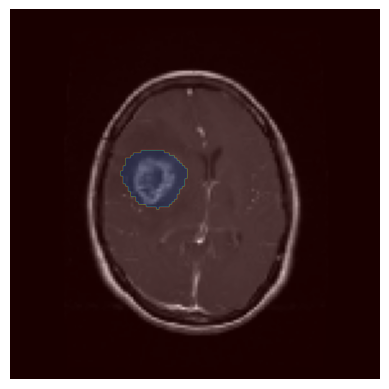

1/1 [==============================] - 0s 44ms/step
(144, 144)


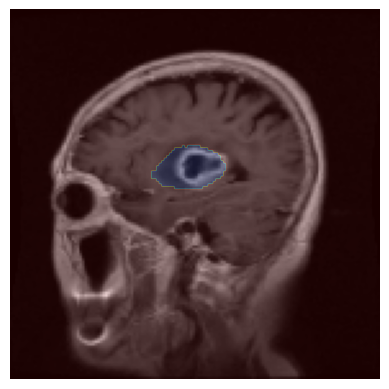

1/1 [==============================] - 0s 75ms/step
(144, 144)


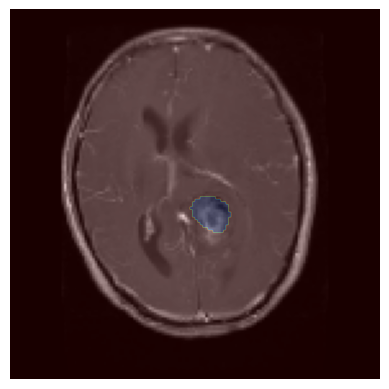

1/1 [==============================] - 0s 54ms/step
(144, 144)


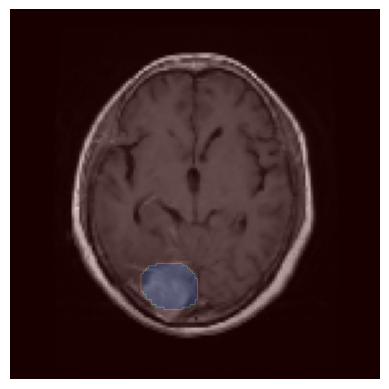

1/1 [==============================] - 0s 30ms/step
(144, 144)


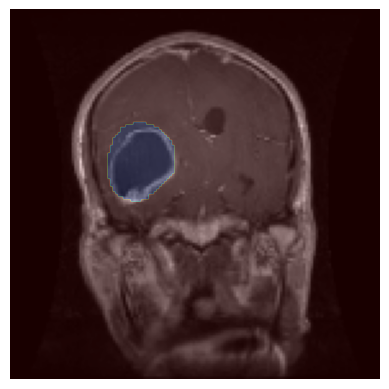

1/1 [==============================] - 0s 32ms/step
(144, 144)


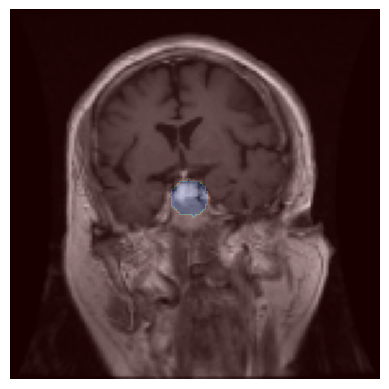

1/1 [==============================] - 0s 102ms/step
(144, 144)


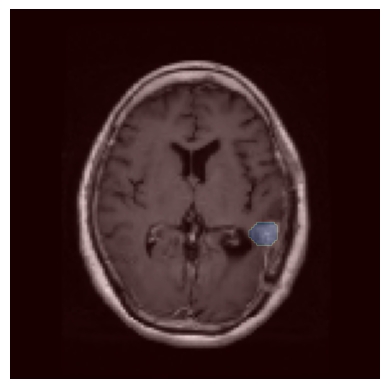

1/1 [==============================] - 0s 39ms/step
(144, 144)


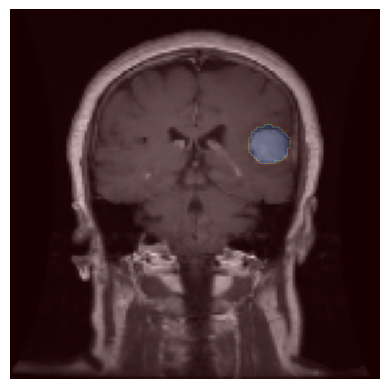

1/1 [==============================] - 0s 33ms/step
(144, 144)


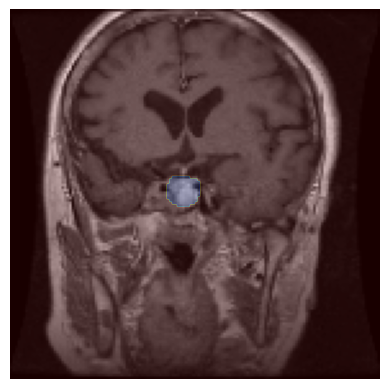

1/1 [==============================] - 0s 32ms/step
(144, 144)


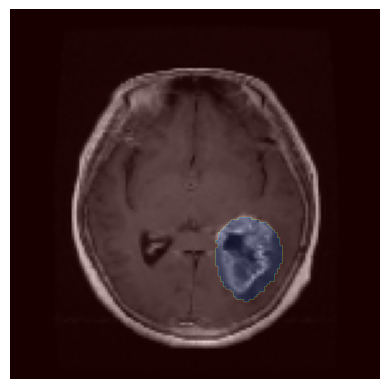

1/1 [==============================] - 0s 36ms/step
(144, 144)


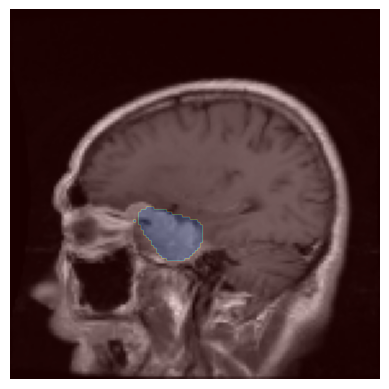

1/1 [==============================] - 0s 33ms/step
(144, 144)


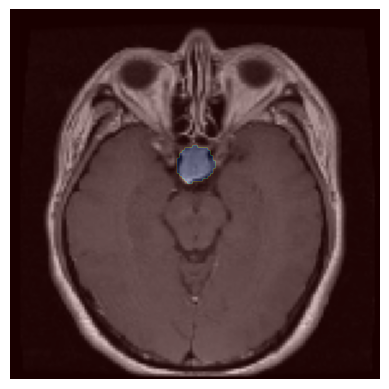

1/1 [==============================] - 0s 54ms/step
(144, 144)


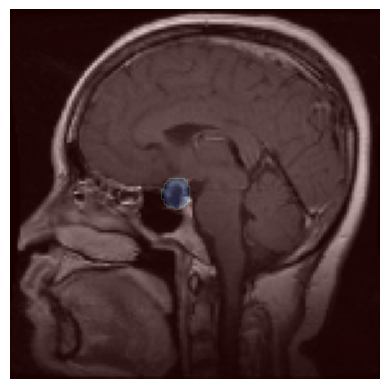

1/1 [==============================] - 0s 44ms/step
(144, 144)


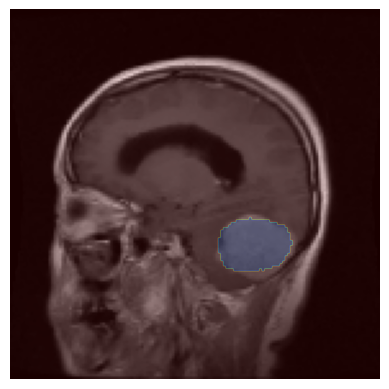

1/1 [==============================] - 0s 53ms/step
(144, 144)


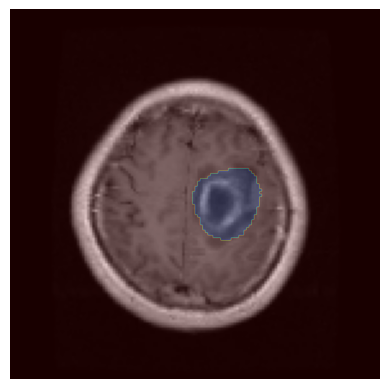

1/1 [==============================] - 0s 37ms/step
(144, 144)


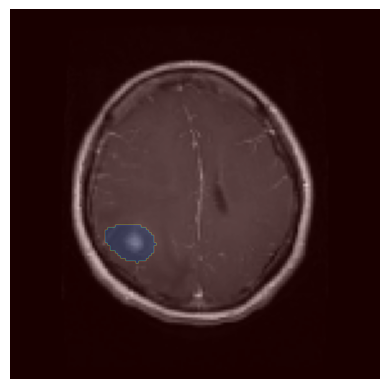

1/1 [==============================] - 0s 49ms/step
(144, 144)


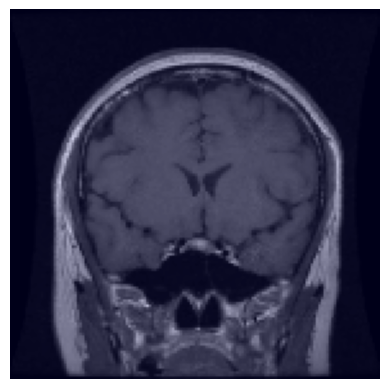

1/1 [==============================] - 0s 39ms/step
(144, 144)


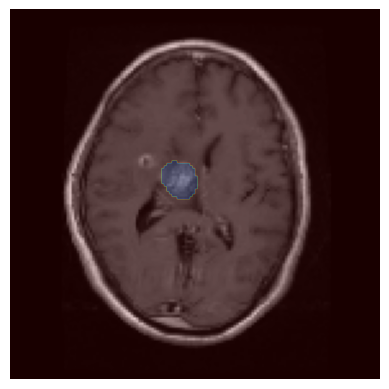

1/1 [==============================] - 0s 46ms/step
(144, 144)


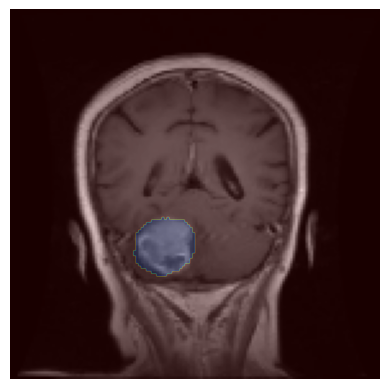

In [35]:
for i in range(20):
    mask = model.predict(np.expand_dims(test_images[i], 0))[0]
    test_image =tf.image.resize(
    test_images[i],
    (144,144))
    display_mask(mask,tf.keras.utils.array_to_img(test_image))